In [20]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris, make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
iris = load_iris()
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
cols = [each[:-5] for each in iris.feature_names]
cols

['sepal length', 'sepal width', 'petal length', 'petal width']

In [4]:
iris_df = pd.DataFrame(data=iris.data, columns=cols)
iris_df.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
feature = iris_df[['petal length', 'petal width']]
feature.head()

,petal length,petal width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [6]:
model = KMeans(n_clusters=3)
model.fit(feature)

KMeans(n_clusters=3)

In [7]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [8]:
model.cluster_centers_

array([[4.29259259, 1.35925926],
       [1.462     , 0.246     ],
       [5.62608696, 2.04782609]])

In [9]:
predict = pd.DataFrame(model.predict(feature), columns=['cluster'])
feature = pd.concat([feature, predict], axis=1)
feature.head()

,petal length,petal width,cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1


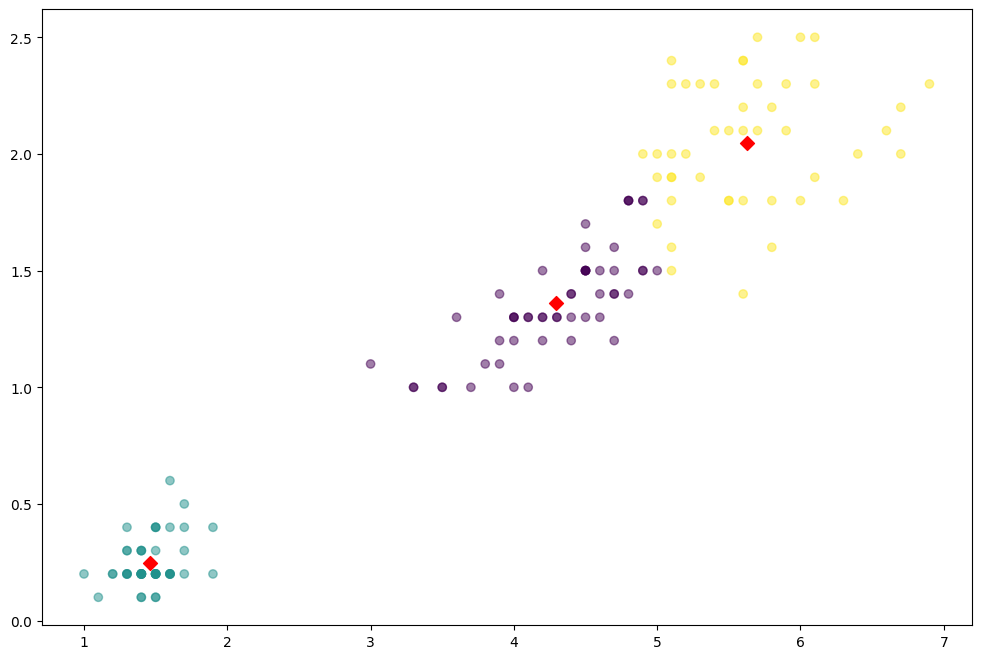

In [10]:
centers = pd.DataFrame(model.cluster_centers_,
                       columns=['petal length', 'petal width'])
center_x = centers['petal length']
center_y = centers['petal width']

plt.figure(figsize=(12,8))
plt.scatter(feature['petal length'], feature['petal width'],
            c=feature['cluster'], alpha=0.5)
plt.scatter(center_x, center_y, s=50, marker='D', c='r')
plt.show()

In [12]:
X, y =make_blobs(n_samples=200, n_features=2, centers=3,
                 cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

unique, counts = np.unique(y, return_counts=True)
print(unique, counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


In [13]:
cluster_df = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
cluster_df['target'] = y
cluster_df.head()

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0
3,-1.448724,3.384245,2
4,1.214861,5.364896,0


In [14]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=13)
cluster_labels = kmeans.fit_predict(X)
cluster_df['kmeans_label'] = cluster_labels

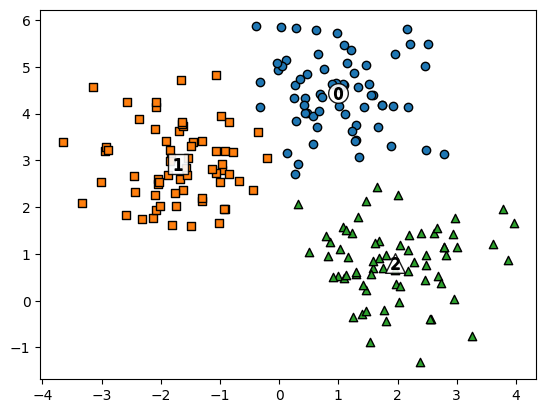

In [15]:
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'P', 'D', 'H', 'x']

for label in unique_labels:
    label_cluster = cluster_df[cluster_df['kmeans_label']==label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k',
                marker=markers[label])
    
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
                alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k',
                marker='$%d$' % label)
    
plt.show()

In [16]:
print(cluster_df.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       0               66
        1                1
1       2               67
2       1               65
        2                1
Name: count, dtype: int64


## 군집 평가

In [18]:
iris = load_iris()
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
iris_df = pd.DataFrame(data=iris.data, columns=feature_names)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,
                random_state=0).fit(iris_df)

In [19]:
iris_df['cluster'] = kmeans.labels_
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [21]:
avg_value = silhouette_score(iris.data, iris_df['cluster'])
score_values = silhouette_samples(iris.data, iris_df['cluster'])

print('avg_value', avg_value)
print('silhouette_samples( ) return 값의 shape', score_values.shape)

avg_value 0.551191604619592
silhouette_samples( ) return 값의 shape (150,)


In [22]:
def visualize_silhouette(cluster_lists, X_features): 

    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

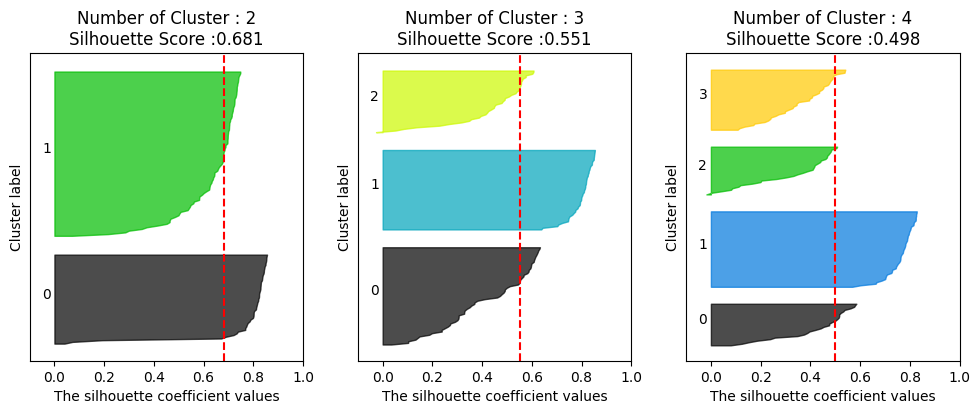

In [23]:
visualize_silhouette([2,3,4], iris.data)